# Census Income Data Analysis

Descriptive statistical methods are used for summarizing the data. 

Multiple machine learning algorithms are fitted to the dataset and their performance is compared:
- Logistic Regression
- Support Vector Machines
- Random Forests
- Gradient Boosting Machines

**Prediction task:** Determine whether a person makes over 50K a year.

**UCI Machine Learning Repository Link:** https://archive.ics.uci.edu/ml/datasets/Census+Income

## Data Dictionary

Listing of attributes in the dataset and their description: 

* **age:** continuous. 
* **workclass:** Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **fnlwgt:** continuous. 
* **education:** Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num:** continuous. 
* **marital-status:** Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation:** Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship:** Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race:** White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
* **sex:** Female, Male. 
* **capital-gain:** continuous. 
* **capital-loss:** continuous. 
* **hours-per-week:** continuous. 
* **native-country:** United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* **salary:** >50K, <=50K. 

In [1]:
''' 
The list of packages used for data anlysis.
'''

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import sklearn.linear_model as sklm
import pylab
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
'''
Importing census data (adult.data.csv) as a dataframe using Padas and
displaying the first N rows.
'''
census_data = pd.read_csv("./adult.data.csv",
                          names = ["age", "workclass", "fnlwgt", 
                                   "education","education_num",
                                   "martial_status","occupation",
                                   "relationship","race","sex",
                                   "capital_gain","capital_loss",
                                   "hours_per_week","native_country",
                                   "salary"]) 

head = int(raw_input("To display first N rows, enter N: "))
census_data.head(head)

To display first N rows, enter N: 6


,age,workclass,fnlwgt,education,education_num,martial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
'''
The response variable (Salary) is converted to a dummy variable with values 0 and 1. 
This is done by using the function pd.get_dummies() which is a part of the pandas library.
0 - represents a salary of <= 50K
1 - represents a salary of > 50k
'''

dummy = pd.get_dummies(census_data['salary'], prefix='salary')

In [4]:
'''
A new dataframe (data) is created here by joining the indipendent variables 
with the dummy response variable.
'''

independent_var = ["age", "workclass", "fnlwgt", 
                "education","education_num",
                "martial_status","occupation",
                "relationship","race","sex",
                "capital_gain","capital_loss",
                "hours_per_week","native_country"]

data = census_data[independent_var].join(dummy.ix[:, 'salary_ >50K':])

head = int(raw_input("To display first N rows, enter N: "))
data.head(head)

To display first N rows, enter N: 10


,age,workclass,fnlwgt,education,education_num,martial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary_ >50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


## Analysis of the Numeric Variables:

In [5]:
'''
Displaying Summary statisitcs of all the numeric variables in the dataset. 
Nulls values are handled automatically.
'''
census_data.describe(percentiles=True)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,189778.366512,10.080679,1077.648844,87.303830,40.437456
std,13.640433,105549.977697,2.572720,7385.292085,402.960219,12.347429
min,17.000000,12285.000000,1.000000,0.000000,0.000000,1.000000
50%,37.000000,178356.000000,10.000000,0.000000,0.000000,40.000000
100%,90.000000,1484705.000000,16.000000,99999.000000,4356.000000,99.000000
max,90.000000,1484705.000000,16.000000,99999.000000,4356.000000,99.000000


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


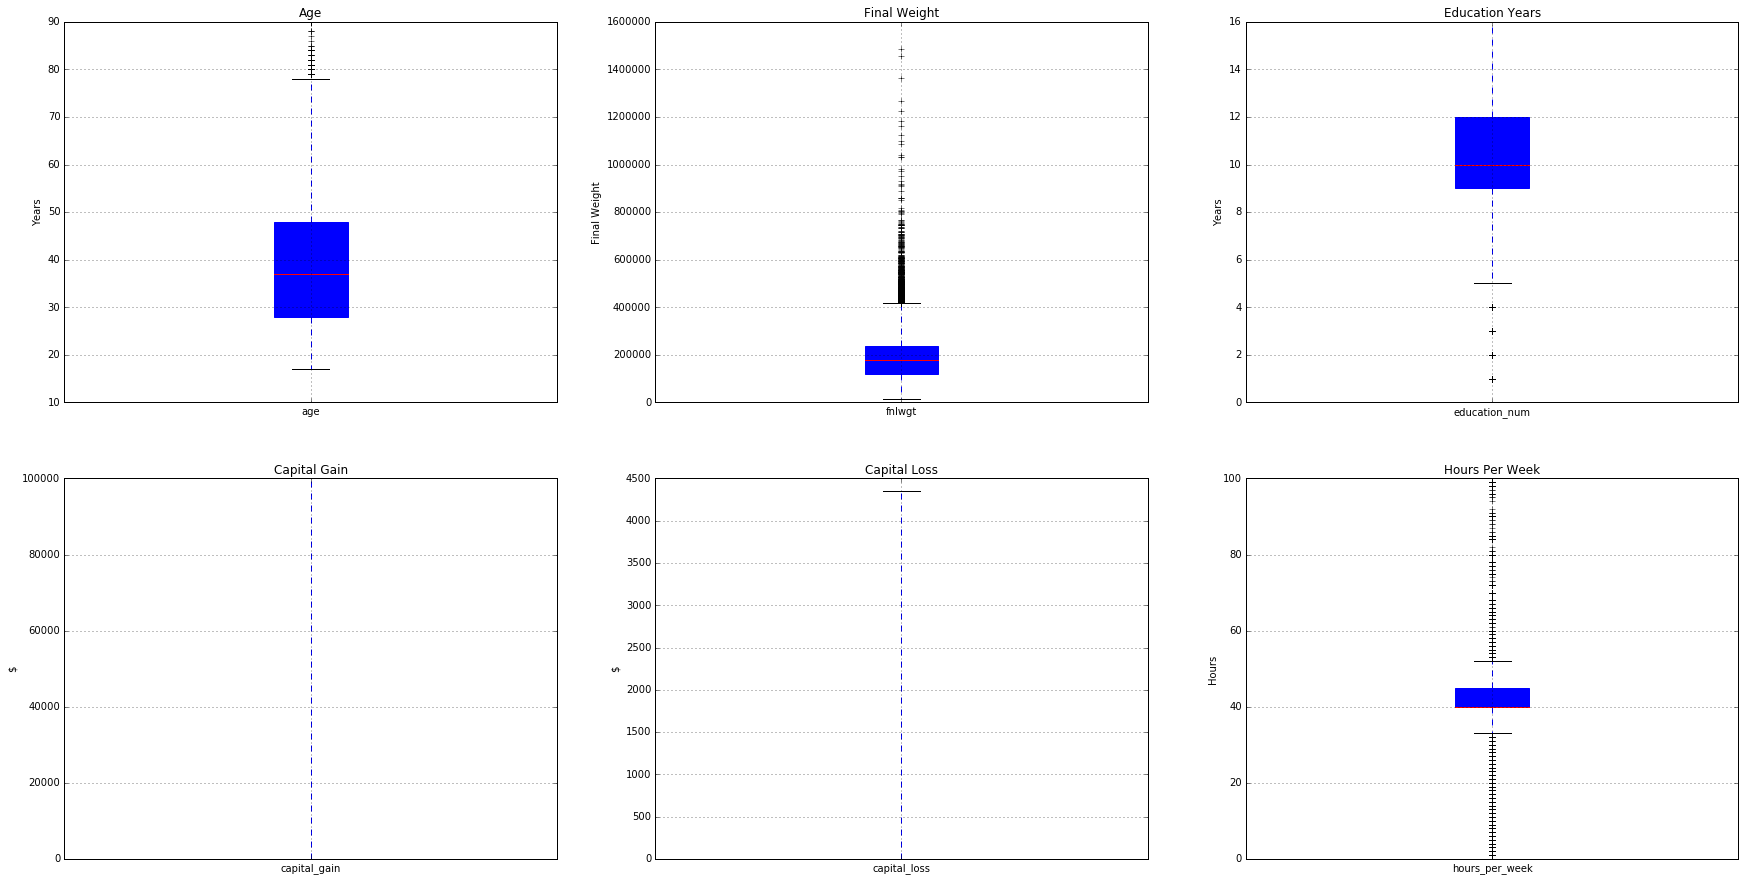

In [6]:
'''
Box plots are useful for highlighting outliers and highlighting the mass of the data.
The Box plots for the above numeric data to depict the 5 number summary is shown below. 
'''

%pylab inline 
plt.figure(figsize=(30,15))

plt.subplot(2, 3, 1)
bp = census_data.boxplot(column = ['age'], patch_artist = True, return_type='dict')
plt.title('Age')
plt.ylabel('Years')

plt.subplot(2, 3, 2)
census_data.boxplot(column = ['fnlwgt'], patch_artist = True, return_type='dict')
plt.title('Final Weight')
plt.ylabel('Final Weight')

plt.subplot(2, 3, 3)
census_data.boxplot(column = ['education_num'],patch_artist = True, return_type='dict')
plt.title('Education Years')
plt.ylabel('Years')

plt.subplot(2, 3, 4)
census_data.boxplot(column = ['capital_gain'],patch_artist = True, return_type='dict')
plt.title('Capital Gain')
plt.ylabel('$')

plt.subplot(2, 3, 5)
census_data.boxplot(column = ['capital_loss'],patch_artist = True, return_type='dict')
plt.title('Capital Loss')
plt.ylabel('$')

plt.subplot(2, 3, 6)
census_data.boxplot(column = ['hours_per_week'],patch_artist = True, return_type='dict')
plt.title('Hours Per Week')
plt.ylabel('Hours')

pylab.show()

Populating the interactive namespace from numpy and matplotlib


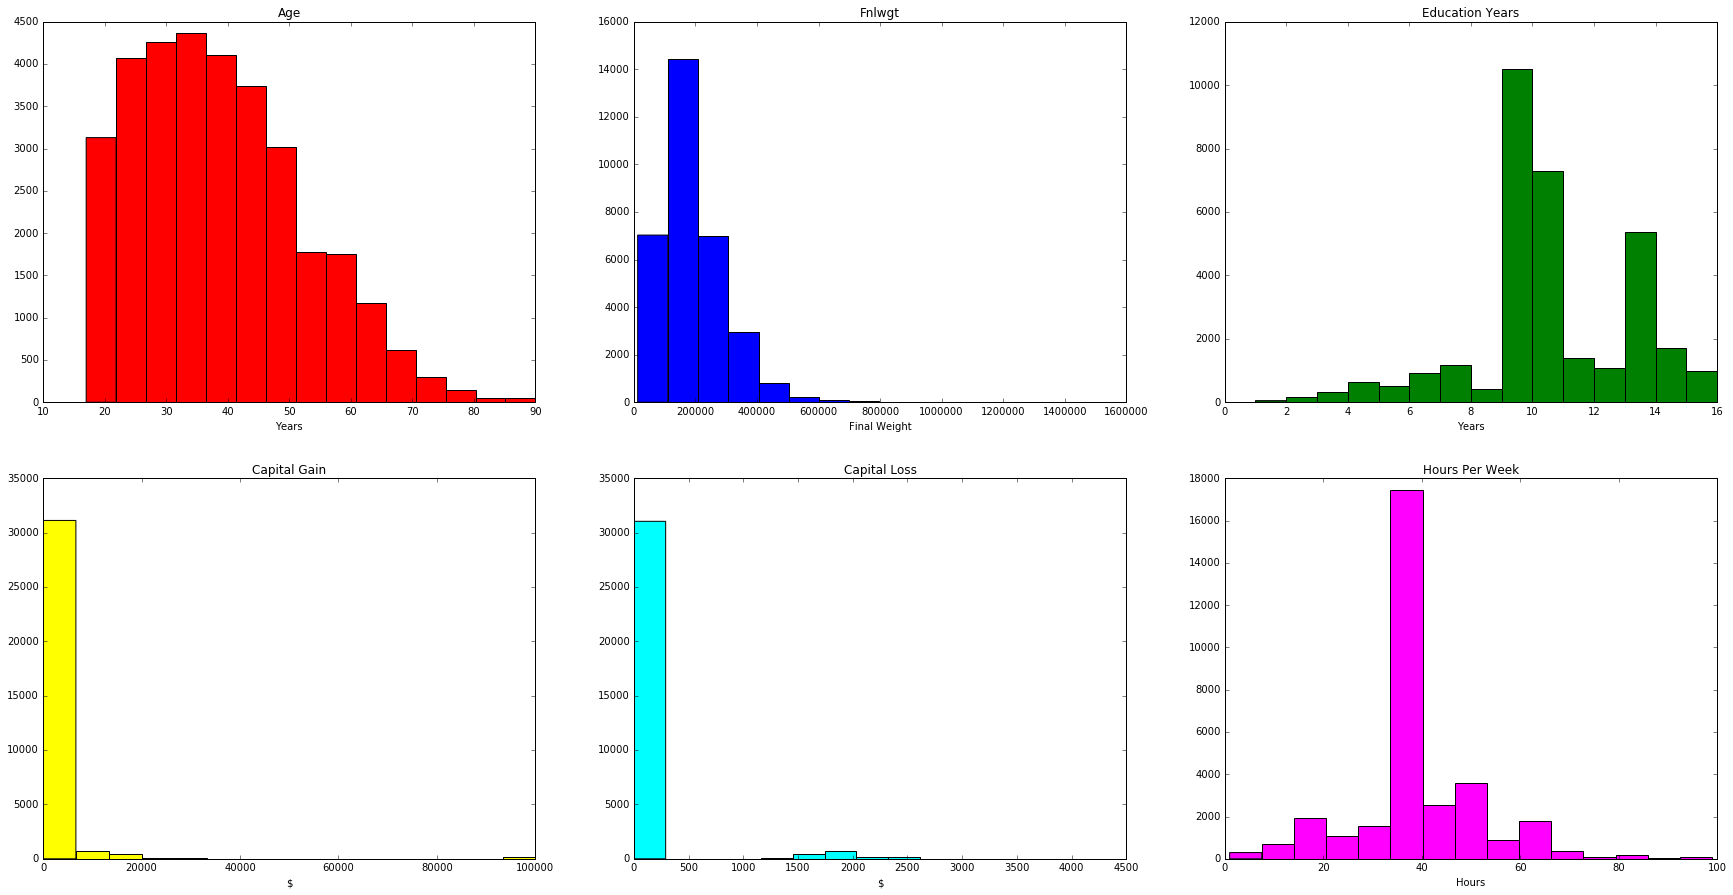

In [7]:
'''
Histogram is a graphical representation of the numerical data. 
It helps determining the distribution of the numerical variable.
''' 

%pylab inline
plt.figure(figsize=(30,15))

plt.subplot(2, 3, 1)
plt.hist(census_data['age'], bins=15, color='red')
plt.title('Age')
plt.xlabel('Years')

plt.subplot(2, 3, 2)
plt.hist(census_data['fnlwgt'], bins=15, color='blue')
plt.xlabel(['2k','3'])
plt.title('Fnlwgt')
plt.xlabel('Final Weight')


plt.subplot(2, 3, 3)
plt.hist(census_data['education_num'], bins=15, color='green')
plt.title('Education Years')
plt.xlabel('Years')

plt.subplot(2, 3, 4)
plt.hist(census_data['capital_gain'], bins=15, color='yellow')
plt.title('Capital Gain')
plt.xlabel('$')

plt.subplot(2, 3, 5)
plt.hist(census_data['capital_loss'], bins=15, color='cyan')
plt.title('Capital Loss')
plt.xlabel('$')

plt.subplot(2, 3, 6)
plt.hist(census_data['hours_per_week'], bins=15, color='magenta')
plt.title('Hours Per Week')
plt.xlabel('Hours')

pylab.show()

Populating the interactive namespace from numpy and matplotlib


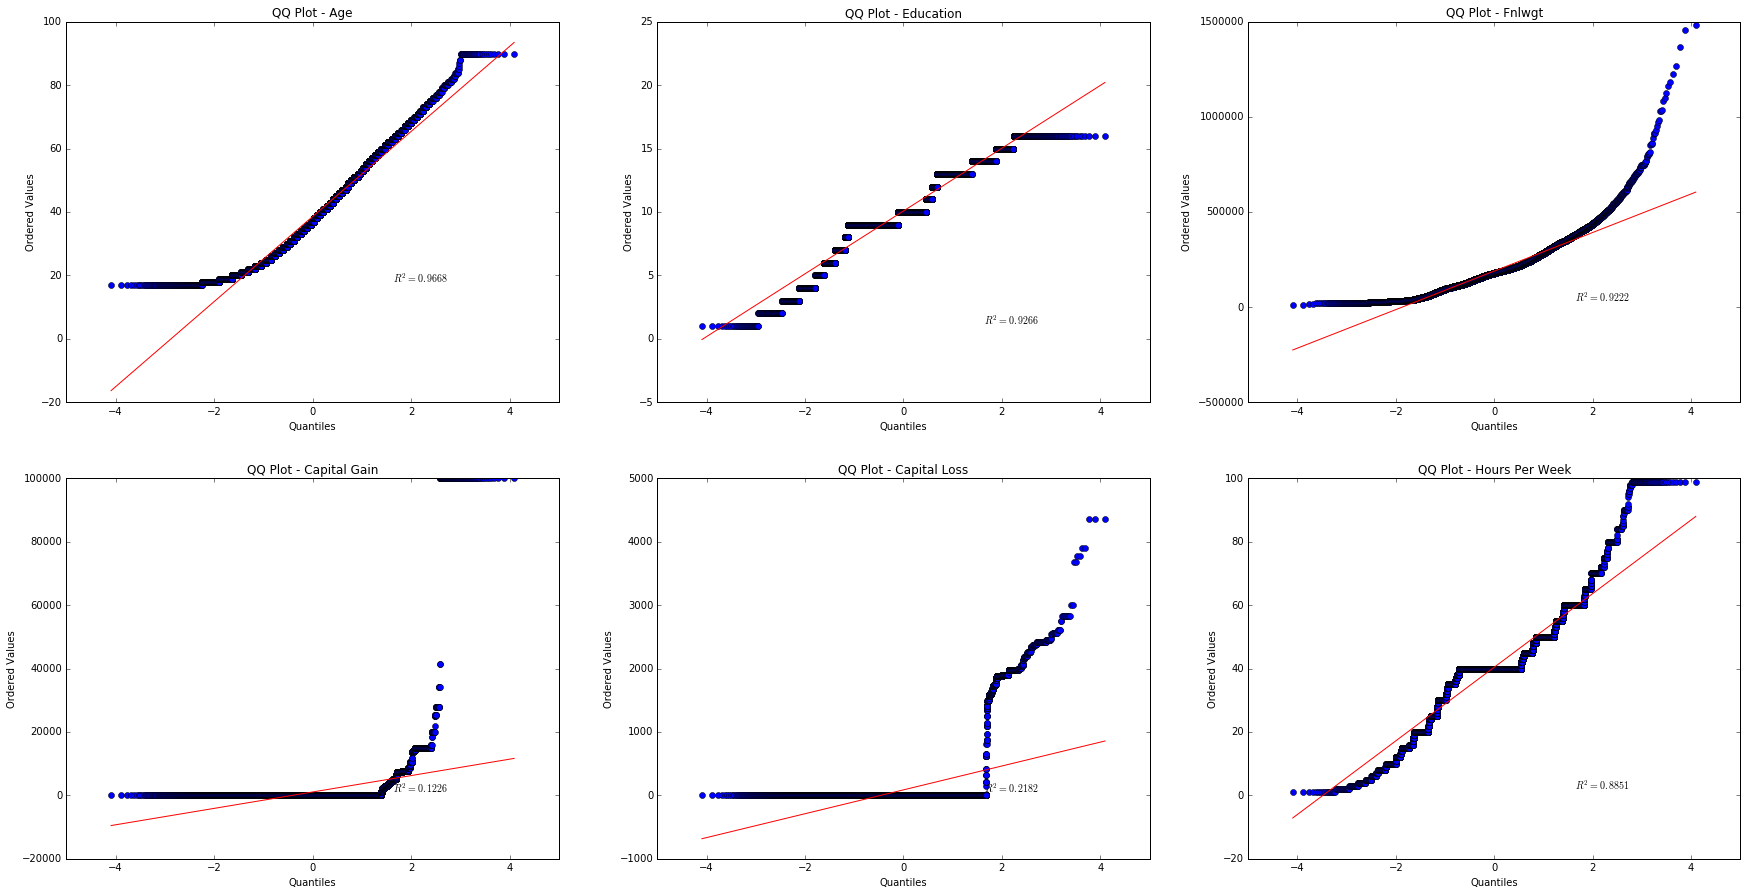

In [8]:
'''
Plotting the distribution for each numeric variable using qq-plots against Gaussian.
The more linear the plot (straight line, 45 degree angle), the distribution is closer to Normal Distribution.
If the qq-plot follows a S-shape, the distribution is more skewed compared to the Normal Distribution.
'''

%pylab inline
plt.figure(figsize=(30,15))

plt.subplot(2, 3, 1)
stats.probplot(census_data['age'], dist = "norm", plot=pylab)
plt.title('QQ Plot - Age')

plt.subplot(2, 3, 2)
stats.probplot(census_data['education_num'], dist = "norm", plot=pylab)
plt.title('QQ Plot - Education')

plt.subplot(2, 3, 3)
stats.probplot(census_data['fnlwgt'], dist = "norm", plot=pylab)
plt.title('QQ Plot - Fnlwgt')

plt.subplot(2, 3, 4)
stats.probplot(census_data['capital_gain'], dist = "norm", plot=pylab)
plt.title('QQ Plot - Capital Gain')

plt.subplot(2, 3, 5)
stats.probplot(census_data['capital_loss'], dist = "norm", plot=pylab)
plt.title('QQ Plot - Capital Loss')

plt.subplot(2, 3, 6)
stats.probplot(census_data['hours_per_week'], dist = "norm", plot=pylab)
plt.title('QQ Plot - Hours Per Week')

pylab.show()

Populating the interactive namespace from numpy and matplotlib


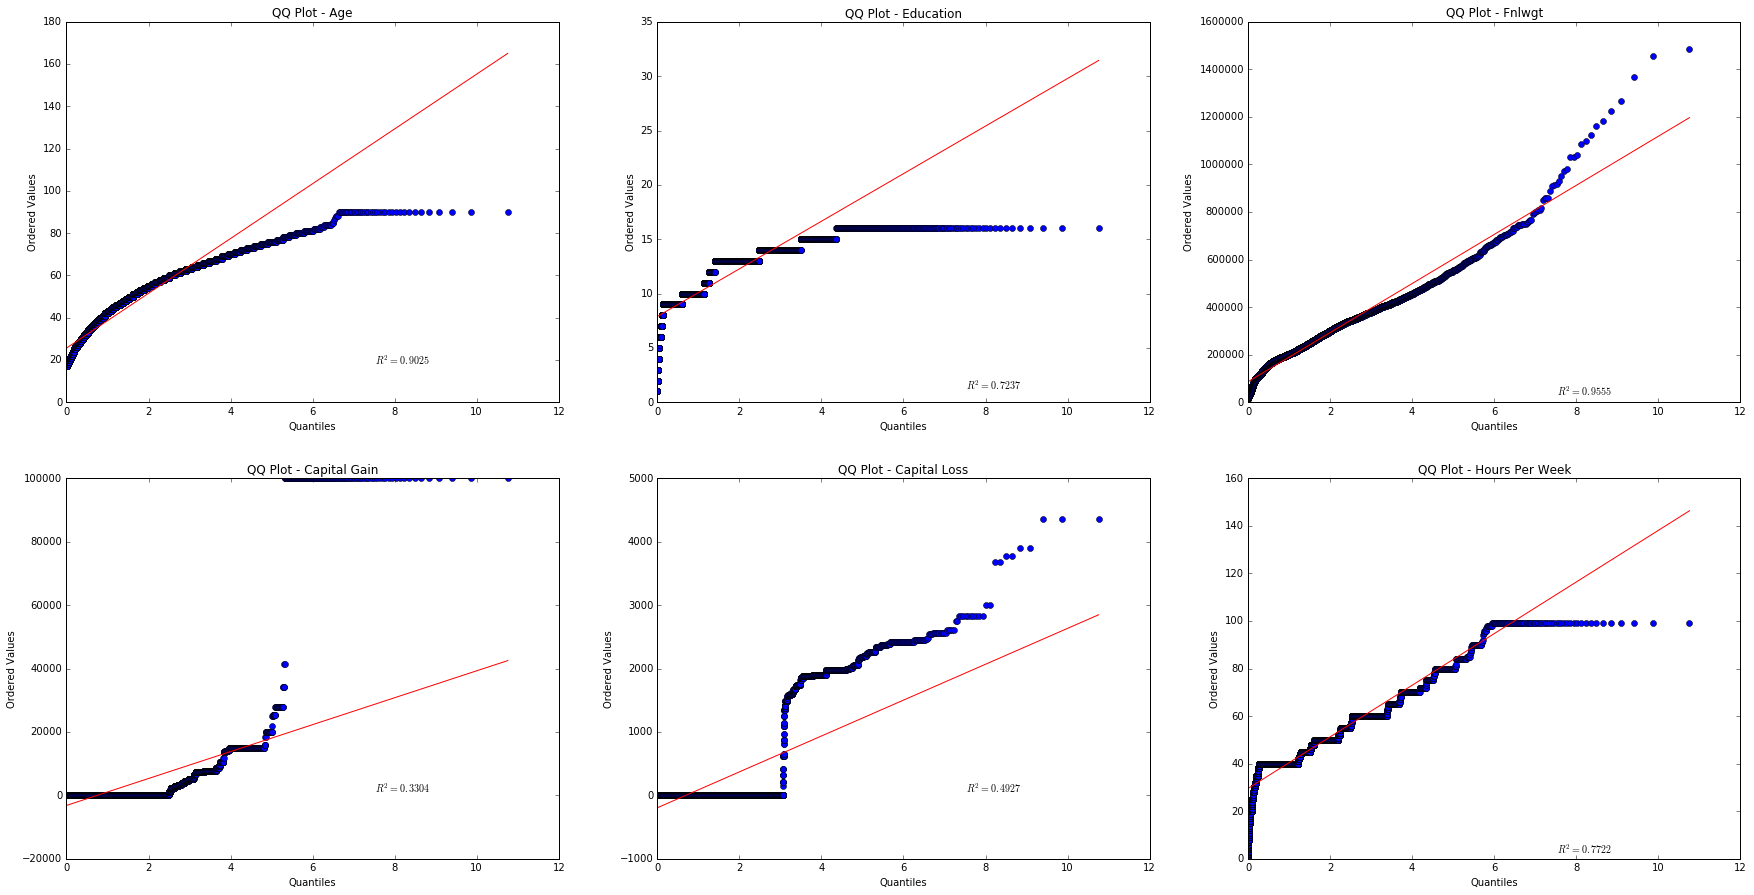

In [9]:
'''
Plotting the distribution for each numeric variable using qq-plots against Power Law Distribution.
The more linear the plot (straight line, 45 degree angle), the distribution is closer to Exponential. 
If the qq-plot follows a S-shape, the distribution is more skewed compared to the Exponential Distribution.
'''

%pylab inline
plt.figure(figsize=(30,15))

plt.subplot(2, 3, 1)
stats.probplot(census_data['age'], dist = "expon", plot=pylab)
plt.title('QQ Plot - Age')

plt.subplot(2, 3, 2)
stats.probplot(census_data['education_num'], dist = "expon", plot=pylab)
plt.title('QQ Plot - Education')

plt.subplot(2, 3, 3)
stats.probplot(census_data['fnlwgt'], dist = "expon", plot=pylab)
plt.title('QQ Plot - Fnlwgt')

plt.subplot(2, 3, 4)
stats.probplot(census_data['capital_gain'], dist = "expon", plot=pylab)
plt.title('QQ Plot - Capital Gain')

plt.subplot(2, 3, 5)
stats.probplot(census_data['capital_loss'], dist = "expon", plot=pylab)
plt.title('QQ Plot - Capital Loss')

plt.subplot(2, 3, 6)
stats.probplot(census_data['hours_per_week'], dist = "expon", plot=pylab)
plt.title('QQ Plot - Hours Per Week')

pylab.show()

In [10]:
'''
Pearson Correlation Matrix for numeric variables.
'''
census_data.corr(method ='pearson')

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education_num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital_gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital_loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours_per_week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


In [11]:
'''
Spearman Correlation Matrix for numeric variables.
'''
census_data.corr(method ='spearman')

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.078141,0.066345,0.124948,0.058484,0.142907
fnlwgt,-0.078141,1.000000,-0.035706,-0.006039,-0.006914,-0.021621
education_num,0.066345,-0.035706,1.000000,0.119140,0.074749,0.167215
capital_gain,0.124948,-0.006039,0.119140,1.000000,-0.066569,0.093322
capital_loss,0.058484,-0.006914,0.074749,-0.066569,1.000000,0.059852
hours_per_week,0.142907,-0.021621,0.167215,0.093322,0.059852,1.000000


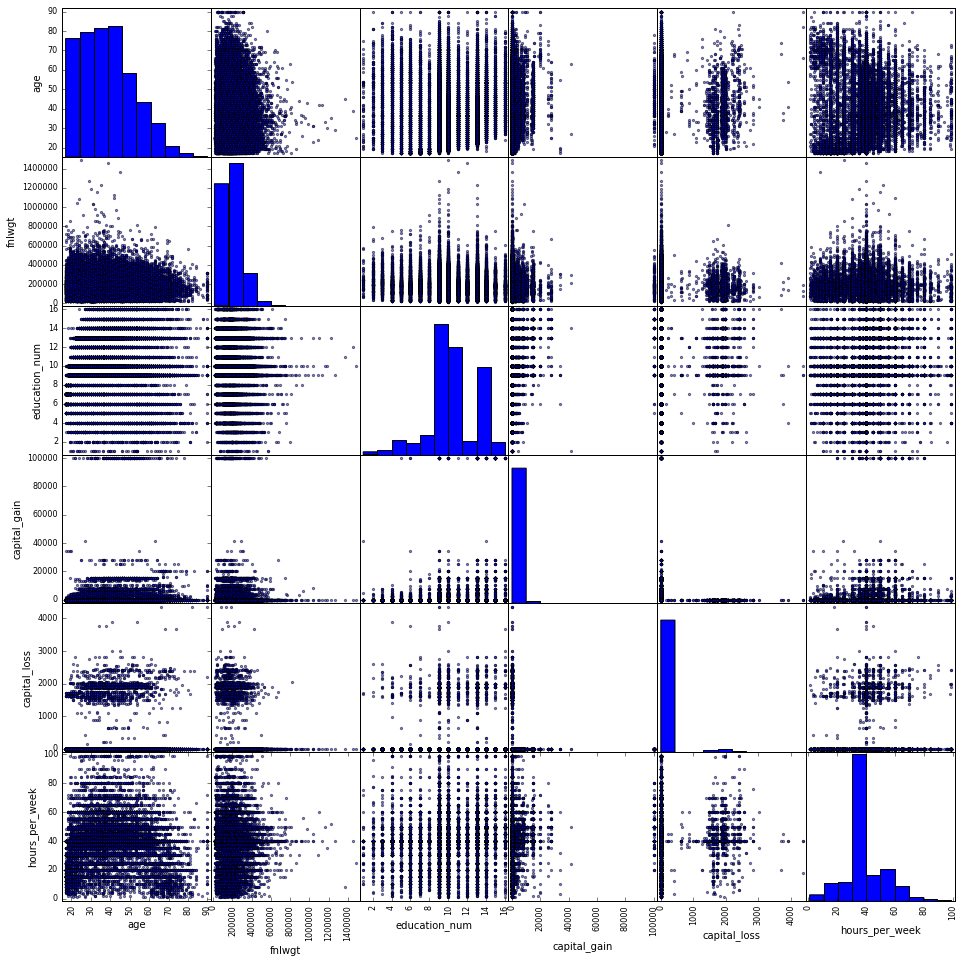

In [12]:
'''
A scatter plot matrix of all the numeric varibles.
'''
axes = pd.tools.plotting.scatter_matrix(census_data, alpha=0.5, figsize=(16, 16))

* From the above computations, no useful or striking insights have been found yet except that the age apprears to follow an approximate normal distribution and the fnlwgt varibles follows an approximate exponential distribution.

## Analysis of the Categorical Variables:

`%matplotlib` prevents importing * from pylab and numpy


Populating the interactive namespace from numpy and matplotlib

Enter the name of the category to display.
Choose from workclass, education, martial_status, occupation, relationship, race, sex, native_country and salary:
workclass


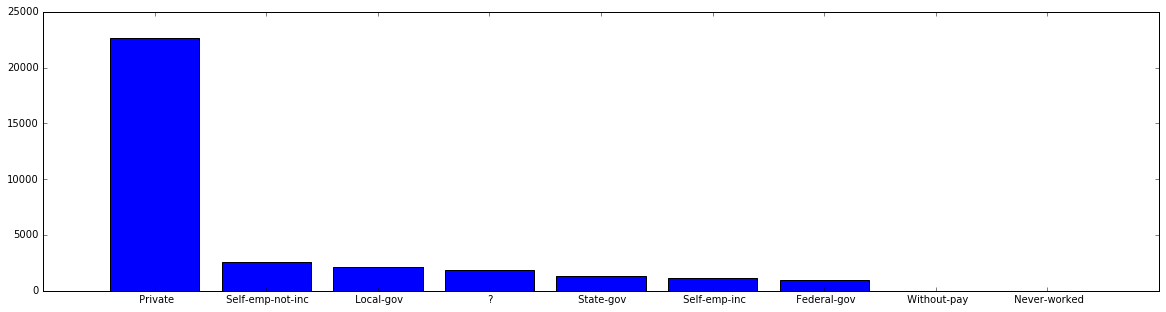

In [13]:
'''
The bar plot shows the frequency of the categorical variable. 
Enter the name of the categorical variable to look at the bar plot. 
This plot is dynamic in nature. On entering a different category, and pressing cntrl + Enter, the plot will change.
'''

%pylab inline

print "\nEnter the name of the category to display."
print "Choose from workclass, education, martial_status, occupation, relationship, race, sex, native_country and salary:"
category = raw_input()

dictionary = {
    "workclass" : 1,
    "education" : 3,
    "martial_status": 5,
    "occupation": 6,
    "relationship": 7,
    "race": 8,
    "sex": 9,
    "native_country": 13,
    "salary": 14
}

index = dictionary[category]

series = data.ix[:,index]
counts = series.value_counts()

cat = []
y_height = []

for i in counts.keys():
    cat.append(i)
    y_height.append(counts[i])

y_pos = np.arange(len(cat))

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
ax.bar(y_pos,y_height, align = 'center')
plt.xticks(y_pos, cat)
plt.show()

Populating the interactive namespace from numpy and matplotlib

Enter the name of the category to display.
Choose from workclass, education, martial_status, occupation, relationship, race, sex, native country and salary:
sex


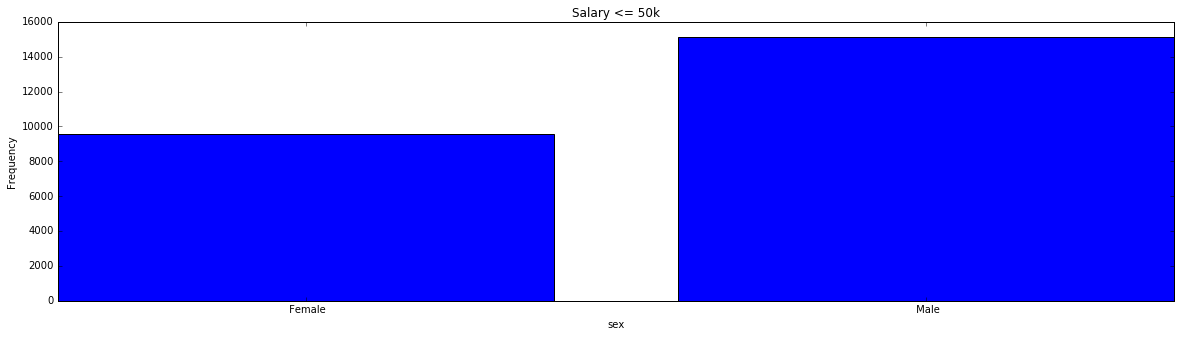

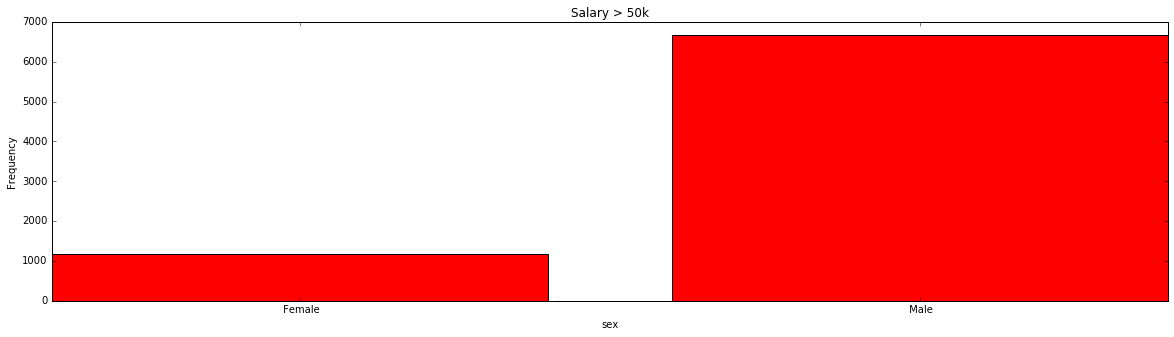

In [14]:
'''
The bar charts below shows the count of each indipendent variable with respect to the dependent variable.
For each variable, the bar plot shows the count for <= 50K (blue) and > 50k (red).
The plot is dynamic and thus the variable of interest is enetered by the user.
'''

%pylab inline

print "\nEnter the name of the category to display."
print "Choose from workclass, education, martial_status, occupation, relationship, race, sex, native country and salary:"
category = raw_input()

group = data.groupby([category,'salary_ >50K']).size()
less_than_50k = group.ix[:,0]
greater_than_50k = group.ix[:,1]

labels_0 = []
values_0 = []
count_0 = 0

labels_1 = []
values_1 = []
count_1 = 0

for elem in less_than_50k.keys():
    labels_0.append(elem)
    values_0.append(less_than_50k[count_0])
    count_0 += 1
    
for elem in greater_than_50k.keys():
    labels_1.append(elem)
    values_1.append(greater_than_50k[count_1])
    count_1 += 1
    

y_pos1 = np.arange(len(labels_0))
y_pos2 = np.arange(len(labels_1))

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
ax.bar(y_pos1,values_0, align = 'center')
plt.xticks(y_pos1, labels_0)
plt.title('Salary <= 50k')
plt.xlabel(category)
plt.ylabel('Frequency')

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
ax.bar(y_pos2,values_1, align = 'center', color = 'red')
plt.xticks(y_pos2, labels_1)
plt.title('Salary > 50k')
plt.xlabel(category)
plt.ylabel('Frequency')
plt.show()

## Pre-Processing Categorical Values in the Training and Testing Data

### Training:

In [15]:
'''
Pre-Processing training data (adult.data.csv) by converting the catergorical variables to dummy variables.
This is because the package scikit learn only accepts numeric variables.
'''

# dropping salary because it is the response variable
train_x1 = census_data.drop('salary', axis = 1) 

# dropping native_country because of inconsistent categories in training and testing
train_x = train_x1.drop('native_country', axis = 1) 

# converting rest of the categorical data into binary variable (0,1)
training_data = pd.get_dummies(train_x)

head = int(raw_input("To display first N rows, enter N: "))
training_data.head(head)

To display first N rows, enter N: 6


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
5,37,284582,14,0,0,40,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0


### Testing:

In [16]:
'''
The testing dataset is a seperate file avaliable from the UCI repository.
'''

pre_test = pd.read_csv("./adult.test.csv",
                          names = ["age", "workclass", "fnlwgt", 
                                   "education","education_num",
                                   "martial_status","occupation",
                                   "relationship","race","sex",
                                   "capital_gain","capital_loss",
                                   "hours_per_week","native_country",
                                   "salary"]) 

census_data_test = pre_test.ix[1:] # removing the first row because it is a string of unwanted data

head = int(raw_input("To display first N rows, enter N: "))
census_data_test.head(head)

To display first N rows, enter N: 6


,age,workclass,fnlwgt,education,education_num,martial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
1,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
2,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
3,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
4,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
5,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
6,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.


In [17]:
'''
The response variable (Salary) in the testing data is converted to a dummy variable with values 0 and 1. 
This is done by using the function pd.get_dummies() which is a part of the pandas library.
0 - represents a salary of <= 50K
1 - represents a salary of > 50k
'''

dummyY = pd.get_dummies(census_data_test['salary'], prefix= 'salary')

independent_var = ["age", "workclass", "fnlwgt", 
                "education","education_num",
                "martial_status","occupation",
                "relationship","race","sex",
                "capital_gain","capital_loss",
                "hours_per_week","native_country"]


testing_data = census_data_test[independent_var].join(dummyY.ix[:, 'salary_ >50K':])

head = int(raw_input("To display first N rows, enter N: "))
testing_data.head(head)

To display first N rows, enter N: 6


,age,workclass,fnlwgt,education,education_num,martial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary_ >50K.
1,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
2,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
3,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
4,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
5,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0
6,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0


In [18]:
'''
The test_y stores the response variable from the testing dataset
The train_y stores the response variable from the training 
'''

test_y = testing_data['salary_ >50K.']
train_y = data['salary_ >50K'] 

In [19]:
'''
The current type of the age column is Object.
The age column is converted to numeric.
'''

temp = census_data_test['age']
num_age = pd.to_numeric(temp)
census_data_test['age'] = num_age

/Users/Riddhik/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [20]:
'''
Pre-Processing testing data (adult.test.csv) by converting the catergorical variables to dummy variables.
This is because the package scikit learn only accepts numeric variables.
'''

# dropping salary because it is the response variable
test_x1 = census_data_test.drop('salary', axis = 1)

# dropping native_country because of inconsistent categories in training and testing
test_x = test_x1.drop('native_country', axis = 1)

# converting rest of the categorical data into binary variable (0,1)
testing_data = pd.get_dummies(test_x)

head = int(raw_input("To display first N rows, enter N: "))
testing_data.head(head)

To display first N rows, enter N: 6


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
1,25,226802,7,0,0,40,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
2,38,89814,9,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,28,336951,12,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
4,44,160323,10,7688,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
5,18,103497,10,0,0,30,1,0,0,0,...,1,0,0,0,0,0,0,1,1,0
6,34,198693,6,0,0,30,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


## Logistic Regression Model on the Dataset

In [21]:
'''
Fitting the logistic model to the training data
'''

lr = LogisticRegression().fit(training_data,train_y)

In [22]:
'''
Accuracy of the linear regression model on the training data.
'''

training_accuracy = lr.score(training_data,train_y)
print "The accuracy on the training set is %.2f" % (training_accuracy*100),'%'

The accuracy on the training set is 79.80 %


In [23]:
'''
Examinig the coefficients and thier values.
'''

pd.DataFrame(zip(training_data.columns, np.transpose(lr.coef_)))

,0,1
0,age,[-0.0052988413848]
1,fnlwgt,[-3.67884580652e-06]
2,education_num,[-0.002236854912]
3,capital_gain,[0.000337313188844]
4,capital_loss,[0.000777477192005]
5,hours_per_week,[-0.00984497248789]
6,workclass_ ?,[-0.000416037230529]
7,workclass_ Federal-gov,[0.00013635219248]
8,workclass_ Local-gov,[5.3723306782e-05]
9,workclass_ Never-worked,[-2.27692877679e-06]


In [24]:
'''
Logistic Regression Model Evaluation using training data.
'''

print "\nSnapshot of the predictions from the Logistic Model:"
predictions_logistic = lr.predict(testing_data) #generate predictions
print predictions_logistic


print "\n\nThe Classifier predicts 1 any time the probability in the second column is greater than 0.5:"
probabilities = lr.predict_proba(testing_data) #generate class probabilities
print probabilities


print "\n\nEvaluation metrics: "
print "Accuracy of the model: %.2f" % (metrics.accuracy_score(test_y, predictions_logistic)*100),"%"
print "ROC accuracy score: %.2f"% (metrics.roc_auc_score(test_y, probabilities[:, 1])*100),"%"
print "Mean Squared error: %.2f" % (metrics.mean_squared_error(test_y,predictions_logistic)*100),'%'


print "\n\nConfusion Matrix: "
print metrics.confusion_matrix(test_y, predictions_logistic)


print "\n\nClassification Report: "
print metrics.classification_report(test_y, predictions_logistic)


Snapshot of the predictions from the Logistic Model:
[ 0.  0.  0. ...,  0.  1.  0.]


The Classifier predicts 1 any time the probability in the second column is greater than 0.5:
[[ 0.79976232  0.20023768]
 [ 0.73943835  0.26056165]
 [ 0.85865152  0.14134848]
 ..., 
 [ 0.89069126  0.10930874]
 [ 0.29516482  0.70483518]
 [ 0.81287771  0.18712229]]


Evaluation metrics: 
Accuracy of the model: 79.95 %
ROC accuracy score: 57.41 %
Mean Squared error: 20.05 %


Confusion Matrix: 
[[12019   416]
 [ 2848   998]]


Classification Report: 
             precision    recall  f1-score   support

        0.0       0.81      0.97      0.88     12435
        1.0       0.71      0.26      0.38      3846

avg / total       0.78      0.80      0.76     16281



In [25]:
'''
Evaluating the Logistic Regression model using 10-fold cross-validation.
'''

scores = cross_val_score(LogisticRegression(), \
                         training_data, \
                         train_y, \
                         scoring='accuracy', 
                         cv=10)

print "\nCross-Validated Scores: ", scores
print "\nAvg accuracy of cross-validations:  %.2f" % (scores.mean()*100), "%"


Cross-Validated Scores:  [ 0.79613141  0.79914005  0.79391892  0.79330467  0.79391892  0.80589681
  0.79146192  0.80159705  0.79760442  0.80159705]

Avg accuracy of cross-validations:  79.75 %


## Support Vector Machines

In [26]:
'''
Fitting the SVM model to the training data.
'''

svm = svm.LinearSVC().fit(training_data,train_y)

In [27]:
'''
Accuracy on the training data for the SVM model.
'''

training_accuracy = svm.score(training_data,train_y)
print "The accuracy on the training set is %.2f" % (training_accuracy*100), '%'

The accuracy on the training set is 78.99 %


In [28]:
'''
Examinig the coefficients and thier values.
'''

pd.DataFrame(zip(training_data.columns, np.transpose(svm.coef_)))

,0,1
0,age,[-0.00480414537427]
1,fnlwgt,[-2.10142884642e-06]
2,education_num,[-0.0021606007362]
3,capital_gain,[0.000115492069676]
4,capital_loss,[0.000348208180865]
5,hours_per_week,[-0.00595069319608]
6,workclass_ ?,[-9.10659794364e-05]
7,workclass_ Federal-gov,[2.1736595109e-05]
8,workclass_ Local-gov,[6.23096731724e-06]
9,workclass_ Never-worked,[-7.38734015356e-08]


In [29]:
'''
SVM Model Evaluation using training data.
'''

print "\nSnapshot of the predictions from the SVM Model:"
predictions_svm = svm.predict(testing_data) #generate predictions
print predictions_svm

print "\n\nEvaluation metrics:"
print "Accuracy of the model: %.2f" % (metrics.accuracy_score(test_y, predictions_svm)*100),"%"
print "Mean Squared error: %.2f" % (metrics.mean_squared_error(test_y,predictions_svm)*100),'%'


print "\n\nConfusion Matrix:"
print metrics.confusion_matrix(test_y, predictions_svm)

print "\n\nClassification Report:"
print metrics.classification_report(test_y, predictions_svm)


Snapshot of the predictions from the SVM Model:
[ 0.  0.  0. ...,  0.  0.  0.]


Evaluation metrics:
Accuracy of the model: 79.26 %
Mean Squared error: 20.74 %


Confusion Matrix:
[[12350    85]
 [ 3292   554]]


Classification Report:
             precision    recall  f1-score   support

        0.0       0.79      0.99      0.88     12435
        1.0       0.87      0.14      0.25      3846

avg / total       0.81      0.79      0.73     16281



In [30]:
'''
Evaluate the SVM model using 10-fold cross-validation
'''

scores = cross_val_score(svm, \
                         testing_data, \
                         test_y, \
                         scoring='accuracy', 
                         cv=10)

print "Cross-Validated Scores: ", scores
print "\nAvg accuracy of cross-validations:  %.2f" % (scores.mean()*100), "%"

Cross-Validated Scores:  [ 0.40024555  0.7888275   0.78637201  0.791283    0.791283    0.7960688
  0.79102643  0.7904118   0.24830977  0.79778734]

Avg accuracy of cross-validations:  69.82 %


## Random Forest

In [31]:
'''
Fitting the Random Forest model to the training data. 
'''

rf = RandomForestClassifier().fit(training_data,train_y)

In [32]:
'''
Accuracy of the Random Forest model on the training data.
'''

training_accuracy = rf.score(training_data,train_y)
print "The accuracy on the training set is %.2f" % (training_accuracy*100),'%'

The accuracy on the training set is 98.76 %


In [33]:
'''
Random Forest Model Evaluation using training data.
'''

print "\nSnapshot of the predictions from the RF Model:"
predictions_rf = rf.predict(testing_data) #generate predictions
print predictions_rf


print "\n\nThe probabilities predicted by the Classifier:"
probabilities = rf.predict_proba(testing_data) #generate class probabilities
print probabilities


print "\n\nEvaluation metrics: "
print "Accuracy of the model: %.2f" % (metrics.accuracy_score(test_y, predictions_rf)*100),"%"
print "ROC accuracy score: %.2f"% (metrics.roc_auc_score(test_y, probabilities[:, 1])*100),"%"
print "Mean Squared error: %.2f" % (metrics.mean_squared_error(test_y,predictions_rf)*100),'%'


print "\n\nConfusion Matrix: "
print metrics.confusion_matrix(test_y, predictions_rf)


print "\n\nClassification Report: "
print metrics.classification_report(test_y, predictions_rf)


Snapshot of the predictions from the RF Model:
[ 0.  0.  0. ...,  1.  0.  1.]


The probabilities predicted by the Classifier:
[[ 1.   0. ]
 [ 0.9  0.1]
 [ 0.5  0.5]
 ..., 
 [ 0.2  0.8]
 [ 0.7  0.3]
 [ 0.2  0.8]]


Evaluation metrics: 
Accuracy of the model: 84.65 %
ROC accuracy score: 87.73 %
Mean Squared error: 15.35 %


Confusion Matrix: 
[[11547   888]
 [ 1611  2235]]


Classification Report: 
             precision    recall  f1-score   support

        0.0       0.88      0.93      0.90     12435
        1.0       0.72      0.58      0.64      3846

avg / total       0.84      0.85      0.84     16281



In [34]:
'''
Evaluate the RF model using 10-fold cross-validation.
'''

scores = cross_val_score(RandomForestClassifier(), \
                         testing_data, \
                         test_y, \
                         scoring='accuracy', 
                         cv=10)

print "Cross-Validated Scores: ", scores
print "\nAvg accuracy of cross-validations:  %.2f" % (scores.mean()*100), "%"

Cross-Validated Scores:  [ 0.8330264   0.85328422  0.84100675  0.84960098  0.84407612  0.84152334
  0.85064536  0.85187462  0.85617701  0.85863553]

Avg accuracy of cross-validations:  84.80 %


## Gradient Boosting Machines

In [35]:
'''
Fitting the GBM model to the training data. 
'''

gb = GradientBoostingClassifier().fit(training_data,train_y)

In [36]:
'''
Accuracy of the GBM model on the training data.
'''

training_accuracy = gb.score(training_data,train_y)
print "The accuracy on the training set is %.2f" % (training_accuracy*100),'%'

The accuracy on the training set is 86.90 %


In [37]:
'''
GBM Model Evaluation using training data.
'''

print "\nSnapshot of the predictions from the RF Model:"
predictions_gb = gb.predict(testing_data) #generate predictions
print predictions_gb


print "\n\nThe probabilities predicted by the Classifier:"
probabilities = gb.predict_proba(testing_data) #generate class probabilities
print probabilities


print "\n\nEvaluation metrics: "
print "Accuracy of the model: %.2f" % (metrics.accuracy_score(test_y, predictions_gb)*100),"%"
print "ROC accuracy score: %.2f" % (metrics.roc_auc_score(test_y, probabilities[:, 1])*100),"%"
print "Mean Squared error: %.2f" % (metrics.mean_squared_error(test_y,predictions_gb)*100),'%'


print "\n\nConfusion Matrix: "
print metrics.confusion_matrix(test_y, predictions_gb)


print "\n\nClassification Report: "
print metrics.classification_report(test_y, predictions_gb)


Snapshot of the predictions from the RF Model:
[ 0.  0.  0. ...,  1.  0.  1.]


The probabilities predicted by the Classifier:
[[ 0.98647913  0.01352087]
 [ 0.80515466  0.19484534]
 [ 0.69683453  0.30316547]
 ..., 
 [ 0.25620844  0.74379156]
 [ 0.73240582  0.26759418]
 [ 0.21141703  0.78858297]]


Evaluation metrics: 
Accuracy of the model: 87.08 %
ROC accuracy score: 92.08 %
Mean Squared error: 12.92 %


Confusion Matrix: 
[[11824   611]
 [ 1493  2353]]


Classification Report: 
             precision    recall  f1-score   support

        0.0       0.89      0.95      0.92     12435
        1.0       0.79      0.61      0.69      3846

avg / total       0.87      0.87      0.86     16281



In [38]:
'''
Evaluate the GBM model using 10-fold cross-validation
'''

scores = cross_val_score(GradientBoostingClassifier(), \
                         testing_data, \
                         test_y, \
                         scoring='accuracy', 
                         cv=10)

print "Cross-Validated Scores: ", scores
print "\nAvg accuracy of cross-validations:  %.2f" % (scores.mean()*100), "%"

Cross-Validated Scores:  [ 0.85758134  0.87292818  0.87047268  0.87661142  0.86249233  0.86363636
  0.8733866   0.86846958  0.86846958  0.87400123]

Avg accuracy of cross-validations:  86.88 %


# Notes:

* The Gradient Boosting Machines model gives the most accurate predictions in this case **(87.08%)** and gives the lowest Mean Square Error **(12.92%)**.
* The Linear SVM model gives the least accuracy for predictions **(79.26%)** with an **MSE = 20.74%**.
* Logistic Regression **(MSE = 20.05%)** and Random Forest **(MSE = 15.35%)** perform pretty well.